In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv('/content/Energy Consumption/household_power_consumption.txt',sep=';',parse_dates={'dt':['Date','Time']},index_col='dt',na_values=['nan','?'],
               low_memory=False,infer_datetime_format=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [91]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [92]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [93]:
for j in range(0,7):
  df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [94]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

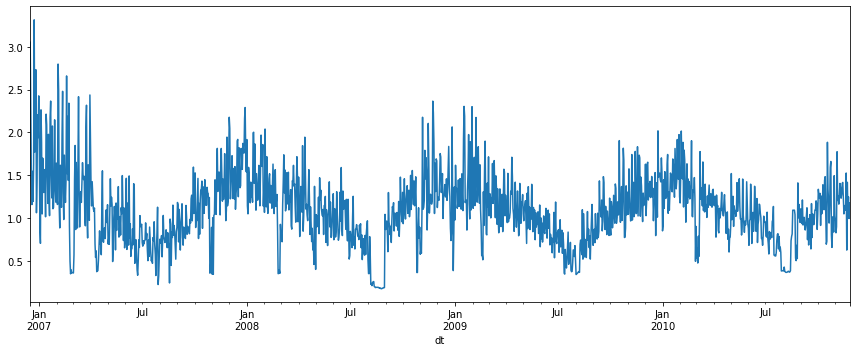

In [95]:
df['Global_active_power'].resample(rule='D').mean().plot(figsize=(12,5))
plt.tight_layout()

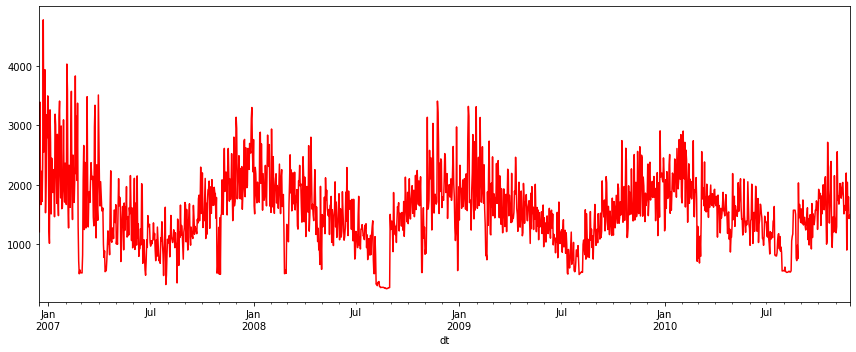

In [96]:
df['Global_active_power'].resample(rule='D').sum().plot(figsize=(12,5),c='red')
plt.tight_layout()

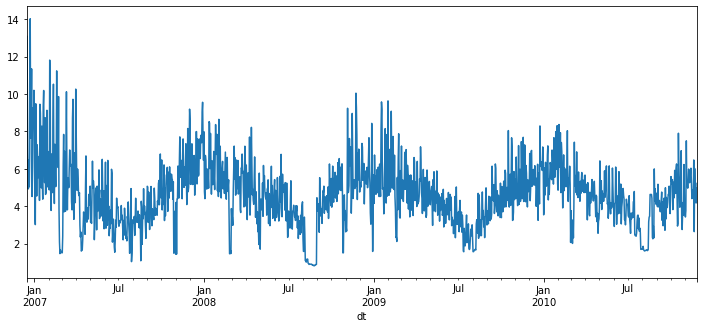

In [97]:
df['Global_intensity'].resample('D').mean().plot(figsize=(12,5))

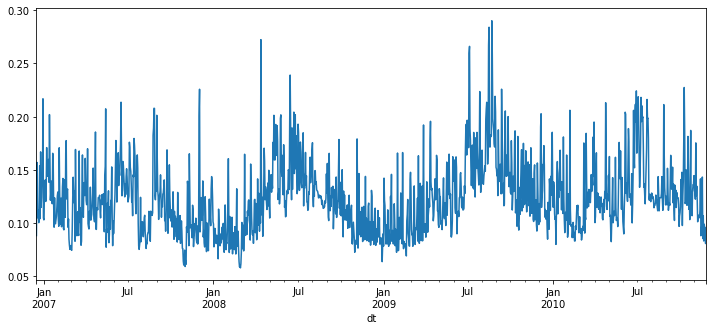

In [98]:
df['Global_reactive_power'].resample('D').mean().plot(figsize=(12,5))

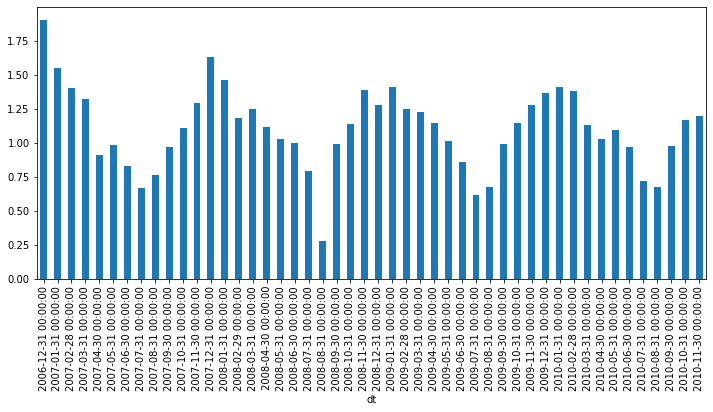

In [99]:
df['Global_active_power'].resample(rule='M').mean().plot(figsize=(12,5),kind='bar')

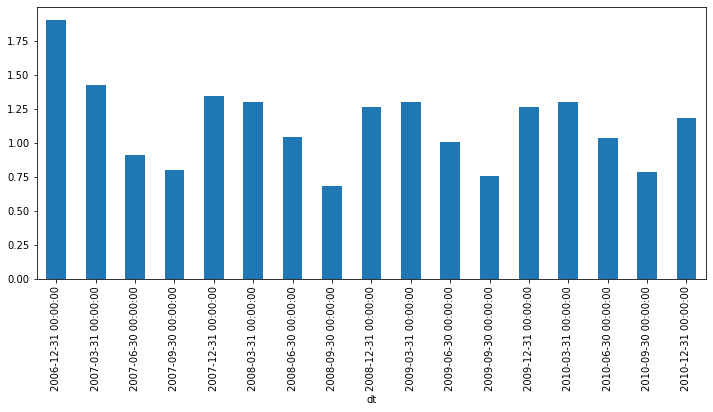

In [100]:
df['Global_active_power'].resample(rule='Q').mean().plot(figsize=(12,5),kind='bar')

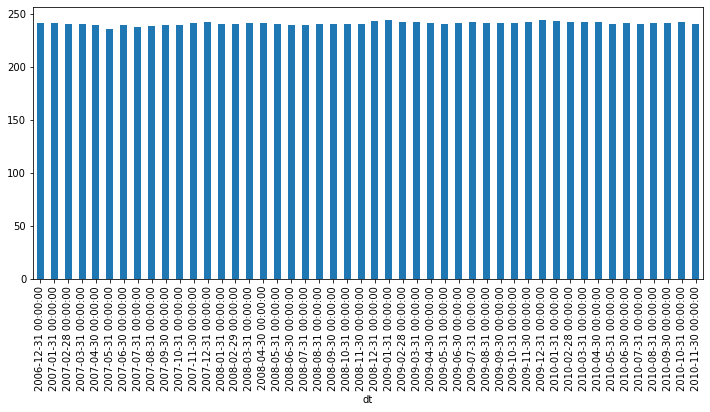

In [101]:
df['Voltage'].resample('M').mean().plot(kind='bar',figsize=(12,5))

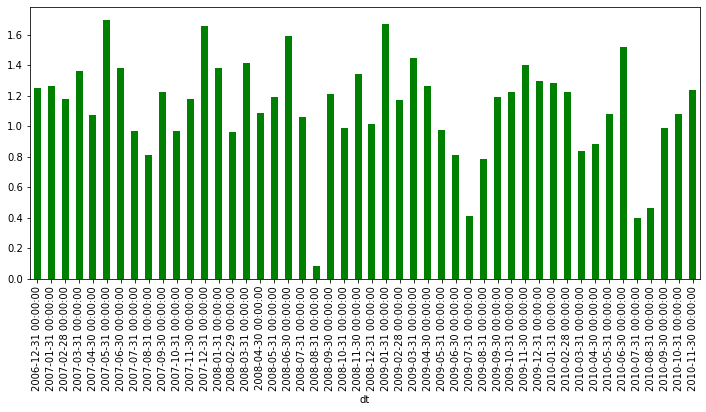

In [102]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar',figsize=(12,5),color='green')

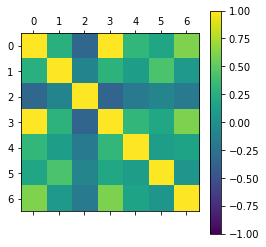

In [103]:
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1)
plt.colorbar()

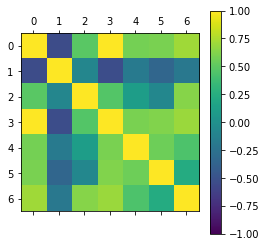

In [104]:
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1)
plt.colorbar()

In [105]:
df.shape

(2075259, 7)

In [106]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  dff = pd.DataFrame(data)
  cols, names = list(), list()
  
  for i in range(n_in, 0, -1):
    cols.append(dff.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    for i in range(0, n_out):
      cols.append(dff.shift(-i))
      if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
      else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  
  if dropnan:
    agg.dropna(inplace=True)
  return agg

In [107]:
df_resample=df.resample('h').mean()

In [108]:
df_resample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [109]:
df_resample.shape

(34589, 7)

In [110]:
values=df_resample.values

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(values)

In [113]:
scaled.shape

(34589, 7)

In [114]:
type(scaled)

numpy.ndarray

In [115]:
reframed=series_to_supervised(scaled,1,1)

In [116]:
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)

In [117]:
print
(reframed.head())

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
1,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.782418,0.545045
2,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.509006
3,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.488550
4,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.455597
5,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.322555


In [118]:
values=reframed.values

In [119]:
n_train_set=365*24
train_data=values[:n_train_set,:]
test_data=values[n_train_set:,:]

train_X,train_y=train_data[:,:-1],train_data[:,-1]
test_X,test_y=test_data[:,:-1],test_data[:,-1]

train_X=train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X=test_X.reshape((test_X.shape[0],1,test_X.shape[1]))

In [120]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)


In [121]:
import tensorflow as tf
import keras
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D


In [122]:
model=Sequential()
model.add(LSTM(100,input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

In [123]:
model.compile(loss=tf.keras.metrics.mean_squared_error,optimizer='adam')

In [124]:
history=model.fit(train_X,train_y,epochs=20,batch_size=70,validation_data=(test_X,test_y),shuffle=False)

Epoch 1/20
126/126 [==============================] - 4s 18ms/step - loss: 0.0216 - val_loss: 0.0120
Epoch 2/20
126/126 [==============================] - 2s 17ms/step - loss: 0.0125 - val_loss: 0.0105
Epoch 3/20
126/126 [==============================] - 2s 16ms/step - loss: 0.0114 - val_loss: 0.0097
Epoch 4/20
126/126 [==============================] - 2s 16ms/step - loss: 0.0109 - val_loss: 0.0092
Epoch 5/20
126/126 [==============================] - 2s 16ms/step - loss: 0.0107 - val_loss: 0.0093
Epoch 6/20
126/126 [==============================] - 2s 13ms/step - loss: 0.0106 - val_loss: 0.0092
Epoch 7/20
126/126 [==============================] - 2s 16ms/step - loss: 0.0106 - val_loss: 0.0091
Epoch 8/20
126/126 [==============================] - 2s 16ms/step - loss: 0.0105 - val_loss: 0.0092
Epoch 9/20
126/126 [==============================] - 2s 16ms/step - loss: 0.0105 - val_loss: 0.0091
Epoch 10/20
126/126 [==============================] - 2s 15ms/step - loss: 0.0104 - val_lo

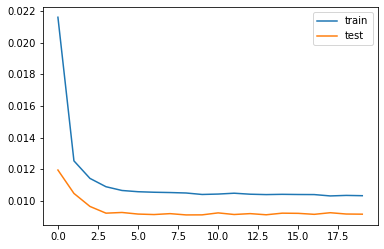

In [125]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [126]:
y_hat=model.predict(test_X)

808/808 [==============================] - 2s 2ms/step


In [127]:
y_hat

array([[0.34200385],
       [0.35969138],
       [0.41555545],
       ...,
       [0.28335956],
       [0.30013046],
       [0.2159241 ]], dtype=float32)

In [128]:
test_X=test_X.reshape((test_X.shape[0],7))


In [133]:
inv_yhat=np.concatenate((y_hat,test_X[:,-6:]),axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [134]:
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [135]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.616


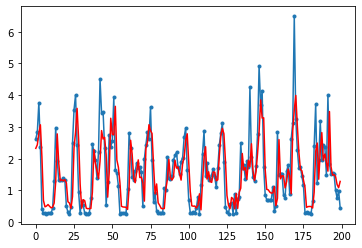

In [136]:
x=[x for x in range(200)]
plt.plot(x,inv_y[:200],marker='.', label="actual")
plt.plot(x,inv_yhat[:200],'r', label="prediction")